In [1]:
import pandas as pd

In [2]:
orders=pd.read_csv('/home/myilmaz/Downloads/PatterngoniaDB-Orders.csv')

In [3]:
clients=pd.read_csv('/home/myilmaz/Downloads/Patterngonia DB - Users.csv')

In [4]:
clients.head()

,user_id,email,first_name,last_name,gender,birthday,city,state,newsletter_sign_up_date
0,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,NaN
1,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24
2,3,nefen@gmail.com,Nefen,Matthew,Male,NaN,Brooklyn,New York,2018-07-16
3,4,phillie@gmail.com,Phillie,Lanigan,Female,1968-04-17,Washington,District of Columbia,2017-03-28
4,5,alfredo@gmail.com,Alfredo,Filipiak,Male,1975-12-20,Sarasota,Florida,2017-04-11


In [5]:
from datetime import datetime,date,timedelta
import numpy as np

clients['birthday']=pd.to_datetime(clients['birthday'], infer_datetime_format=True) 
clients['age']=(datetime.today()-clients['birthday'])
clients['age']=clients['age'].apply(lambda x: x.days/365.25)

clients['age']=[round(i) if str(i)!='nan' else None for i in clients['age']]

In [6]:
orders.head()

,order_id,purchase_date,product,listed_price,paid_price,user_id
0,1,2018-03-02,Sneakers,70,70.0,496
1,2,2017-03-16,Tent,400,400.0,512
2,3,2016-09-03,Shirt,50,43.0,821
3,4,2017-04-10,Sneakers,70,70.0,264
4,5,2018-06-23,Shirt,50,35.0,574


In [7]:
both=clients.merge(orders,how='right',on='user_id')

In [8]:
both.head()

,user_id,email,first_name,last_name,gender,birthday,city,state,newsletter_sign_up_date,age,order_id,purchase_date,product,listed_price,paid_price
0,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,NaN,54.0,1017,2018-01-03,Pants,70,51.8
1,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,NaN,54.0,1484,2018-07-18,Hat,20,15.6
2,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,NaN,54.0,1814,2018-03-18,Hat,20,20.0
3,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24,56.0,535,2016-11-06,Tent,400,400.0
4,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24,56.0,700,2018-03-09,Sneakers,70,54.6


In [9]:
both['count']=1

In [10]:
both.dropna(subset=['last_name'],inplace=True)
len(both)

1995

In [11]:
both['discounted']=both['listed_price']-both['paid_price']
both['discounted']=both['discounted'].apply(lambda x: x>0)
both.head()

,user_id,email,first_name,last_name,gender,birthday,city,state,newsletter_sign_up_date,age,order_id,purchase_date,product,listed_price,paid_price,count,discounted
0,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,NaN,54.0,1017,2018-01-03,Pants,70,51.8,1,True
1,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,NaN,54.0,1484,2018-07-18,Hat,20,15.6,1,True
2,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,NaN,54.0,1814,2018-03-18,Hat,20,20.0,1,False
3,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24,56.0,535,2016-11-06,Tent,400,400.0,1,False
4,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24,56.0,700,2018-03-09,Sneakers,70,54.6,1,True


In [12]:
#both['newsletter_sign_up_date']=both['newsletter_sign_up_date'].fillna(0)
both['newsletter_sign_up_date']=pd.to_datetime(both['newsletter_sign_up_date'])
both['purchase_date']=pd.to_datetime(both['purchase_date'])
both['after']=(both['purchase_date']-both['newsletter_sign_up_date'])
both['after']=both['after'].apply(lambda x: x.days>0)
both['newsletter_sign_up_date']=both['newsletter_sign_up_date'].fillna(0)

In [13]:
both.head()

,user_id,email,first_name,last_name,gender,birthday,city,state,newsletter_sign_up_date,age,order_id,purchase_date,product,listed_price,paid_price,count,discounted,after
0,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,0,54.0,1017,2018-01-03,Pants,70,51.8,1,True,False
1,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,0,54.0,1484,2018-07-18,Hat,20,15.6,1,True,False
2,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,0,54.0,1814,2018-03-18,Hat,20,20.0,1,False,False
3,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24 00:00:00,56.0,535,2016-11-06,Tent,400,400.0,1,False,False
4,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24 00:00:00,56.0,700,2018-03-09,Sneakers,70,54.6,1,True,True


In [14]:
both['agebin']=pd.cut(both['age'],bins=4)
both['pricebin']=pd.cut(both['listed_price'],bins=2)

In [15]:
female=pd.DataFrame(both[both['gender']=='Female'])
male=pd.DataFrame(both[both['gender']=='Male'])

In [16]:
female.head()

,user_id,email,first_name,last_name,gender,birthday,city,state,newsletter_sign_up_date,age,order_id,purchase_date,product,listed_price,paid_price,count,discounted,after,agebin,pricebin
11,4,phillie@gmail.com,Phillie,Lanigan,Female,1968-04-17,Washington,District of Columbia,2017-03-28 00:00:00,53.0,1943,2017-05-22,Snacks,5,5.0,1,False,True,"(50.0, 60.0]","(4.605, 202.5]"
13,6,peggi@gmail.com,Peggi,Hackwell,Female,1979-04-18,Evansville,Indiana,0,42.0,737,2017-04-05,Shirt,50,50.0,1,False,False,"(40.0, 50.0]","(4.605, 202.5]"
14,6,peggi@gmail.com,Peggi,Hackwell,Female,1979-04-18,Evansville,Indiana,0,42.0,876,2017-09-19,Pants,70,70.0,1,False,False,"(40.0, 50.0]","(4.605, 202.5]"
15,7,shannen@gmail.com,Shannen,Innocent,Female,1983-09-02,El Paso,Texas,2017-10-21 00:00:00,37.0,261,2017-05-17,Hat,20,16.4,1,True,False,"(29.96, 40.0]","(4.605, 202.5]"
16,7,shannen@gmail.com,Shannen,Innocent,Female,1983-09-02,El Paso,Texas,2017-10-21 00:00:00,37.0,294,2018-07-14,Sneakers,70,70.0,1,False,True,"(29.96, 40.0]","(4.605, 202.5]"


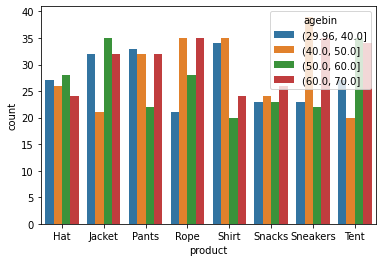

In [17]:
import seaborn as sns
sns.countplot(x="product", hue="agebin", data=female.sort_values('product'))

In [18]:
# Women 30-40 are big buyers of clothing: shirts, pants and jackets and few sneakers (fashion or light hiking)
# Women 40-50 are big buyers shirts,pants, lots of sneakers, and rope but not jackets or tents (VERY active hikers, climbers)
# Women 50-60 are big buyers of tents and jackets (campers)
# Women 60-70 buy everything but shirts and hats (gifts?)

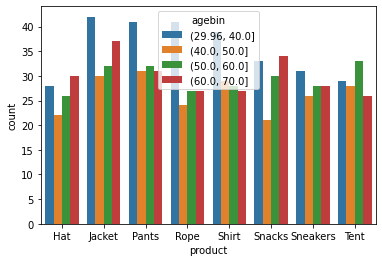

In [19]:
sns.countplot(x="product", hue="agebin", data=male.sort_values('product'))

In [20]:
# Men 30-40 are big buyers of pants, jackets, rope, and shirts (very active hikers, climbers)
# Men 40-50 are not buying rope,snacks, tents or hats. (hikers).
# Men 50-60 are big buyers of tents and snacks and they also buy jackets (campers)
# Men 60-70  are buying lots of jackets (warmth)

one=fnewsies[fnewsies['agebin'].astype(str)=='(29.96, 40.0]']
two=fnewsies[fnewsies['agebin'].astype(str)=='(40.0, 50.0]']
three=fnewsies[fnewsies['agebin'].astype(str)=='(50.0, 60.0]']
four=fnewsies[fnewsies['agebin'].astype(str)=='(60.0, 70.0]']

In [21]:
# Arranging regions by climate, location, mountains

In [22]:
northeast=pd.DataFrame(both[both['state'].isin(['New York','New Jersey','Maine','Massachusetts','Vermont','Connecticut','Pennsylvania','Delaware','Rhode Island','New Hampshire','Maryland','West Virginia','Virginia'])])

In [23]:
southeast=both[both['state'].isin(['Georgia','Florida','North Carolina','South Carolina','Alabama','Mississippi','Arkansas','Louisiana','Kentucky','Tennessee'])]

In [24]:
CA_HI=both[both['state'].isin(['California','Hawaii'])]
southwest=both[both['state'].isin(['Texas','Oklahoma','Arizona','New Mexico'])]
west=both[both['state'].isin(['Oregon','Washington','Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Alaska','North Dakota','South Dakota'])]
midwest=both[both['state'].isin(['Ohio','Illinois','Indiana','Iowa','Michigan','Wisconsin','Minnesota','Missouri','Nebraska','Kansas'])]

In [25]:
northeast

,user_id,email,first_name,last_name,gender,birthday,city,state,newsletter_sign_up_date,age,order_id,purchase_date,product,listed_price,paid_price,count,discounted,after,agebin,pricebin
7,3,nefen@gmail.com,Nefen,Matthew,Male,NaT,Brooklyn,New York,2018-07-16 00:00:00,NaN,433,2016-11-26,Tent,400,400.0,1,False,False,NaN,"(202.5, 400.0]"
8,3,nefen@gmail.com,Nefen,Matthew,Male,NaT,Brooklyn,New York,2018-07-16 00:00:00,NaN,925,2017-01-06,Hat,20,15.4,1,True,False,NaN,"(4.605, 202.5]"
9,3,nefen@gmail.com,Nefen,Matthew,Male,NaT,Brooklyn,New York,2018-07-16 00:00:00,NaN,1552,2017-10-30,Jacket,80,80.0,1,False,False,NaN,"(4.605, 202.5]"
10,3,nefen@gmail.com,Nefen,Matthew,Male,NaT,Brooklyn,New York,2018-07-16 00:00:00,NaN,1725,2016-09-10,Hat,20,20.0,1,False,False,NaN,"(4.605, 202.5]"
41,17,tracy@gmail.com,Tracy,Behling,Female,1973-01-18,Baltimore,Maryland,0,48.0,306,2017-08-03,Rope,20,20.0,1,False,False,"(40.0, 50.0]","(4.605, 202.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,991,zebulon@gmail.com,Zebulon,Braysher,Male,1963-02-24,Mount Vernon,New York,0,58.0,251,2017-05-18,Jacket,80,80.0,1,False,False,"(50.0, 60.0]","(4.605, 202.5]"
1970,991,zebulon@gmail.com,Zebulon,Braysher,Male,1963-02-24,Mount Vernon,New York,0,58.0,640,2018-08-01,Sneakers,70,70.0,1,False,False,"(50.0, 60.0]","(4.605, 202.5]"
1971,991,zebulon@gmail.com,Zebulon,Braysher,Male,1963-02-24,Mount Vernon,New York,0,58.0,820,2018-06-27,Tent,400,400.0,1,False,False,"(50.0, 60.0]","(202.5, 400.0]"
1972,991,zebulon@gmail.com,Zebulon,Braysher,Male,1963-02-24,Mount Vernon,New York,0,58.0,1528,2018-05-31,Sneakers,70,70.0,1,False,False,"(50.0, 60.0]","(4.605, 202.5]"


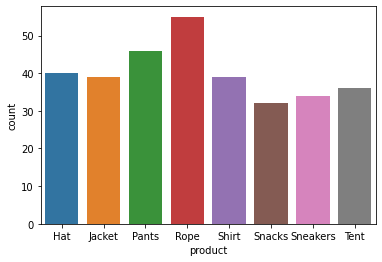

In [26]:
sns.countplot(x="product",  data=northeast.sort_values('product'))

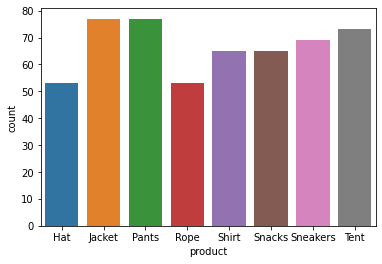

In [27]:
sns.countplot(x="product",  data=southeast.sort_values('product'))

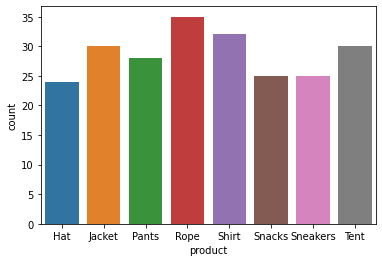

In [28]:
sns.countplot(x="product", data=west.sort_values('product'))

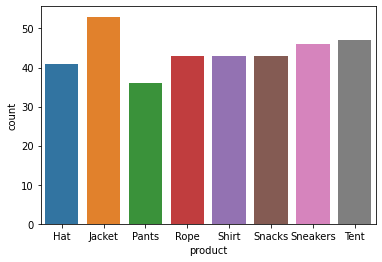

In [29]:
sns.countplot(x="product", data=midwest.sort_values('product'))

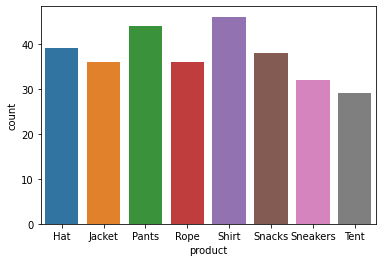

In [30]:
sns.countplot(x="product", data=southwest.sort_values('product'))

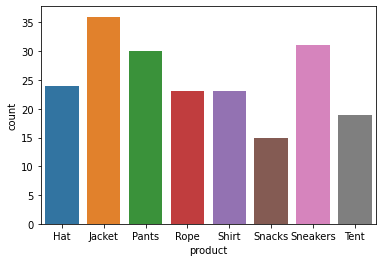

In [31]:
sns.countplot(x="product", data=CA_HI.sort_values('product'))

In [32]:
# In the northeast they are buying rope (climbers)
# In the southeast they are buying everything but rope and hat ( wet weather hikers,campers)
# In the west they are buying everything but hats, pants, sneakers (cold weather campers,climbers)
# In the midwest they are buying everything but hats, pants (cold weather campers,hikers)
# In the southwest they are buying lots of pants, shirts and hats (wow) and very few sneakers and tents (hot/dry weather active,climbers? don't need tents to camp?)
# In HI, CA they are buying jackets, pants and sneakers (wet weather hikers)
# They don't like the snacks in the west, westcoast or northeast

# Demographic/Geographic Segmentation
- Campers: Men and women 50-60. Purchase lots of tents, jackets. Probably live in the southeast,midwest or west regions.
- Hikers: Men 30-50 and women 40-50. Purchase jackets,pants, sneakers.
- Climbers: Men 30-40 and women 40-50. Purchase lots of rope, pants and shirts. Probably live in the northeast or west regions.
- Fashion: Women 30-40 buy pants, shirts, jackets.
- Southwest: Men and women in the southwest region buy pants and shirts.

In [33]:
news=pd.DataFrame(both[both['after']==1])
nonews=pd.DataFrame(both[both['after']==0])

In [34]:
max(news['purchase_date'])

Timestamp('2018-08-14 00:00:00')

In [35]:
min(news['purchase_date'])

Timestamp('2016-10-01 00:00:00')

In [36]:
max(nonews['purchase_date'])


Timestamp('2018-08-14 00:00:00')

In [37]:
min(nonews['purchase_date'])

Timestamp('2016-08-16 00:00:00')

In [38]:
nonews['purchase_early']=nonews['purchase_date'].apply(lambda x: x<pd.Timestamp('2016-10-01'))

In [39]:
nonews=pd.DataFrame(nonews[nonews['purchase_early']==0])

In [40]:
min(nonews['purchase_date'])

Timestamp('2016-10-01 00:00:00')

In [41]:
nonews.head()

,user_id,email,first_name,last_name,gender,birthday,city,state,newsletter_sign_up_date,age,...,purchase_date,product,listed_price,paid_price,count,discounted,after,agebin,pricebin,purchase_early
0,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,0,54.0,...,2018-01-03,Pants,70,51.8,1,True,False,"(50.0, 60.0]","(4.605, 202.5]",False
1,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,0,54.0,...,2018-07-18,Hat,20,15.6,1,True,False,"(50.0, 60.0]","(4.605, 202.5]",False
2,1,byrle@gmail.com,Byrle,Grinishin,Male,1966-08-13,Indianapolis,Indiana,0,54.0,...,2018-03-18,Hat,20,20.0,1,False,False,"(50.0, 60.0]","(4.605, 202.5]",False
3,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24 00:00:00,56.0,...,2016-11-06,Tent,400,400.0,1,False,False,"(50.0, 60.0]","(202.5, 400.0]",False
7,3,nefen@gmail.com,Nefen,Matthew,Male,NaT,Brooklyn,New York,2018-07-16 00:00:00,NaN,...,2016-11-26,Tent,400,400.0,1,False,False,NaN,"(202.5, 400.0]",False


In [42]:
news.head()

,user_id,email,first_name,last_name,gender,birthday,city,state,newsletter_sign_up_date,age,order_id,purchase_date,product,listed_price,paid_price,count,discounted,after,agebin,pricebin
4,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24 00:00:00,56.0,700,2018-03-09,Sneakers,70,54.60,1,True,True,"(50.0, 60.0]","(4.605, 202.5]"
5,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24 00:00:00,56.0,1343,2018-02-02,Snacks,5,4.15,1,True,True,"(50.0, 60.0]","(4.605, 202.5]"
6,2,lucius@gmail.com,Lucius,Fairholme,Male,1965-06-04,Dallas,Texas,2017-04-24 00:00:00,56.0,1508,2017-10-08,Pants,70,53.20,1,True,True,"(50.0, 60.0]","(4.605, 202.5]"
11,4,phillie@gmail.com,Phillie,Lanigan,Female,1968-04-17,Washington,District of Columbia,2017-03-28 00:00:00,53.0,1943,2017-05-22,Snacks,5,5.00,1,False,True,"(50.0, 60.0]","(4.605, 202.5]"
12,5,alfredo@gmail.com,Alfredo,Filipiak,Male,1975-12-20,Sarasota,Florida,2017-04-11 00:00:00,45.0,477,2018-01-22,Pants,70,59.50,1,True,True,"(40.0, 50.0]","(4.605, 202.5]"


In [62]:
#Looking at total paid purchases
#User is a different user if they're a year older, or changed gender
totals=pd.DataFrame(news.groupby(['user_id','gender','birthday','age'])[['paid_price','count','discounted']].sum().reset_index())
totals=totals.rename(columns={'paid_price':'total_spend'})
totals['ave_spend']=totals['total_spend']/totals['count']
totalsno=pd.DataFrame(nonews.groupby(['user_id','gender','birthday','age'])[['paid_price','count','discounted']].sum().reset_index())
totalsno=totalsno.rename(columns={'paid_price':'total_spend'})
totalsno['ave_spend']=totalsno['total_spend']/totals['count']

In [63]:
totalsno['count'].sum()/len(totalsno)

1.9324546952224053

In [64]:
totals['count'].sum()/len(totals)

1.7062314540059347

In [65]:
totalsno['total_spend'].sum()/len(totalsno)

157.5347611202636

In [66]:
totals['total_spend'].sum()/len(totals)

137.0805637982196

In [67]:
totalsno['discounted'].sum()/len(totalsno)

0.9308072487644151

In [68]:
totals['discounted'].sum()/len(totals)

0.798219584569733

The newsletter seems to be encouraging users to buy more discounted items but this is not changing the number of purchased items overall or the total money spent. Let's dig in some more.

In [69]:
totfem=pd.DataFrame(totals[totals['gender']=='Female'])
totmas=pd.DataFrame(totals[totals['gender']=='Male'])

In [70]:
totfemno=pd.DataFrame(totalsno[totalsno['gender']=='Female'])
totmasno=pd.DataFrame(totalsno[totalsno['gender']=='Male'])

In [71]:
totfemno['discounted'].sum()/len(totfemno)

0.9590443686006825

In [72]:
totfem['discounted'].sum()/len(totfem)

0.696969696969697

In [73]:
totmasno['discounted'].sum()/len(totmasno)

0.9044585987261147

In [74]:
totmas['discounted'].sum()/len(totmas)

0.8953488372093024

It seems like female users were more likely than male users to purchase discounted items after receiving a newsletter. Let's see if they purchased more items overall or just purchased more items on discount.

In [75]:
totfemno['count'].sum()/len(totfemno)

1.9624573378839592

In [76]:
totfem['count'].sum()/len(totfem)

1.6181818181818182

 Indeed if we dig into the numbers we see that female users who receive the newsletter are purchasing more items and those items are usually discounted.

In [77]:
totfemno['total_spend'].sum()/len(totfemno)

159.0977815699659

In [78]:
totfem['total_spend'].sum()/len(totfem)

135.0909090909091

# Behavior segmentation
FEMALE USERS who receive the newsletter also spend more money overall. It seems like the newsletter may be  increasing revenue by encouraging female users to buy discounted items. I could use machine learning for this problem but that is not part of the assignment.

# SQL QUERY

In [60]:
# Make age column: Today's date minus birthday in days/365 or years.
# Table has demographic segments, regions

In [61]:
SELECT 
    TIMESTAMPDIFF(YEAR, birthday, CURDATE()) AS age,
    gender,
    state,
    CASE
        WHEN TIMESTAMPDIFF(YEAR, birthday, CURDATE()) >= 30 AND TIMESTAMPDIFF(YEAR, birthday, CURDATE()) <= 40 AND gender = 'Male' THEN 'Hiker-Climber'
        WHEN TIMESTAMPDIFF(YEAR, birthday, CURDATE()) >= 30 AND TIMESTAMPDIFF(YEAR, birthday, CURDATE()) <= 40 AND gender = 'Female' THEN 'Fashion'
        WHEN TIMESTAMPDIFF(YEAR, birthday, CURDATE()) > 40 AND TIMESTAMPDIFF(YEAR, birthday, CURDATE()) <= 50 AND gender = 'Male' THEN 'Hiker'
        WHEN TIMESTAMPDIFF(YEAR, birthday, CURDATE()) > 40 AND TIMESTAMPDIFF(YEAR, birthday, CURDATE()) <= 50 AND gender = 'Female' THEN 'Hiker-Climber'
        WHEN TIMESTAMPDIFF(YEAR, birthday, CURDATE()) > 50 AND TIMESTAMPDIFF(YEAR, birthday, CURDATE()) <= 60 THEN 'Camper'
        ELSE 'ALL'
    END AS user_segment,
    CASE
        WHEN state in ('New York','New Jersey','Maine','Massachusetts','Vermont','Connecticut','Pennsylvania','Delaware','Rhode Island','New Hampshire','Maryland','West Virginia','Virginia') THEN 'Northeast'
        WHEN state in ('Georgia','Florida','North Carolina','South Carolina','Alabama','Mississippi','Arkansas','Louisiana','Kentucky','Tennessee') THEN 'Southeast'
        WHEN state in ('Texas','Oklahoma','Arizona','New Mexico') THEN 'Southwest'
        WHEN state in ('Oregon','Washington','Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Alaska','North Dakota','South Dakota') THEN 'West'
        WHEN state in ('Ohio','Illinois','Indiana','Iowa','Michigan','Wisconsin','Minnesota','Missouri','Nebraska','Kansas') THEN 'Midwest'
        WHEN state in ('California','Hawaii') THEN 'CA-HI'
    END AS region
FROM User;

IndentationError: unexpected indent (<ipython-input-61-fd12a2a50c17>, line 2)